In [1]:
%load_ext autoreload
%autoreload 2

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import time
import girth
# from girth import rasch_conditional
from irt.data.rasch import generate_data, generate_data_positive_scores
from irt.algorithms.spectral_estimator import spectral_estimate
from irt.algorithms import spectral_estimator
from irt.algorithms import conditional_mle, joint_mle
from irt.algorithms import rasch_mml
from irt.algorithms import eigen_vector_method
from irt.evaluation import eval_utils

# import data (you supply this function)
from scipy.stats import norm
# my_data = import_data(filename)

# # Assume its dichotomous data with True -> 1 and False -> 0
# tagged_data = tag_missing_data(my_data, [0, 1])

In [26]:
def relative_betas_error(beta, betah):
    assert(len(beta) == len(betah))
    beta_norm = beta - np.mean(beta)
    betah_norm = betah - np.mean(betah)
    return np.linalg.norm(beta_norm - betah_norm)

def relative_z_error(z, zh):
    return np.linalg.norm(z - zh)/np.linalg.norm(z)

    

In [39]:


errors_arr = []
errors_ase_arr = []
errors_cmle_arr = []
errors_mmle_arr = []
errors_choppin_arr = []
errors_garner_arr = []
errors_saaty_arr = []

time_arr = []
time_ase_arr = []
time_cmle_arr = []
time_mmle_arr = []
time_choppin_arr = []
time_garner_arr = []
time_saaty_arr = []

n_array = [100, 500, 1000, 2500, 5000]
n_trials = 20
m = 100

expected_num_problems = 20

p = expected_num_problems/m
p = 1.
test_var = 2
betas = np.random.normal(0, test_var, size=(m,))
student_var = 3

for n in n_array:
    # w_students = np.ones((n,))
    # p = np.sqrt(np.log(m)/n)
    thetas = np.random.normal(0, student_var, size=(n,))

    error_ase = []
    error_cmle = []
    error_mmle = []
    error_choppin = []
    error_garner = []
    error_saaty = []
    
    time_ase = []
    time_cmle = []
    time_mmle = []
    time_garner = []
    time_choppin = []
    time_saaty = []
    
    auc_mmle = []
    auc_ase = []
    
    for _ in range(n_trials):
        # Generate data
        data = generate_data(betas, thetas, p)

        # Accelerated spectral method
        start = time.time()
        lambd = 1./(m * np.log(m))
        est_ase = spectral_estimate(data, lambd=lambd, regularization="uniform")
        time_ase += [(time.time() - start)]
        error_ase += [relative_betas_error(betas, est_ase)]
        
        # Choppin method
        # start = time.time()
        # est_choppin = eigen_vector_method.choppin_method(data, return_beta=True)
        # time_choppin += [(time.time() - start)]
        # error_choppin += [relative_betas_error(betas, est_choppin)]
        
        # Garner
        start = time.time()
        # est_garner = eigen_vector_method.garner_method(data, return_beta=True)
        est_theta, est_garner = joint_mle.rasch_jml(data)
        time_garner += [(time.time() - start)]
        error_garner += [relative_betas_error(betas, est_garner)]
        
        # Saaty's method
        # start = time.time()
        # est_saaty = eigen_vector_method.saaty_method(data, return_beta=True)
        # time_saaty += [(time.time() - start)]
        # error_saaty += [relative_betas_error(betas, est_saaty)]
        

    errors_ase_arr.append(error_ase)
    errors_cmle_arr.append(error_cmle)
    errors_mmle_arr.append(error_mmle)
    errors_choppin_arr.append(error_choppin)
    errors_garner_arr.append(error_garner)
    errors_saaty_arr.append(error_saaty)
    
    time_ase_arr.append(time_ase)
    time_cmle_arr.append(time_cmle)
    time_mmle_arr.append(time_mmle)
    time_choppin_arr.append(time_choppin)
    time_garner_arr.append(time_garner)
    time_saaty_arr.append(time_saaty)
    
    print(f"n={n}, m={m}, ASE={np.nanmean(error_ase)} ({np.nanmean(time_ase)}), CMLE={np.nanmean(error_cmle)} ({np.nanmean(time_cmle)}), MMLE={np.nanmean(error_mmle)} ({np.nanmean(time_mmle)}), " +
          f"Choppin={np.nanmean(error_choppin)} ({np.nanmean(time_choppin)}), Garner={np.nanmean(error_garner)} ({np.nanmean(time_garner)}), Saaty={np.nanmean(error_saaty)} ({np.nanmean(time_saaty)})")

n=100, m=100, ASE=4.93721011417426 (0.011448287963867187), CMLE=nan (nan), MMLE=nan (nan), Choppin=nan (nan), Garner=7.789913183582056 (0.15873138904571532), Saaty=nan (nan)
n=500, m=100, ASE=2.374127565554044 (0.009057557582855225), CMLE=nan (nan), MMLE=nan (nan), Choppin=nan (nan), Garner=8.090789464244452 (0.5557078719139099), Saaty=nan (nan)
n=1000, m=100, ASE=1.5426009141143566 (0.017286789417266846), CMLE=nan (nan), MMLE=nan (nan), Choppin=nan (nan), Garner=8.139589556091337 (0.9331810474395752), Saaty=nan (nan)
n=2500, m=100, ASE=1.0152110695168948 (0.018273425102233887), CMLE=nan (nan), MMLE=nan (nan), Choppin=nan (nan), Garner=8.159737871626563 (2.2036587476730345), Saaty=nan (nan)
n=5000, m=100, ASE=0.700307729675491 (0.032782447338104245), CMLE=nan (nan), MMLE=nan (nan), Choppin=nan (nan), Garner=8.074703729726512 (5.0078588128089905), Saaty=nan (nan)


In [35]:
errors_ase_arr = np.array(errors_ase_arr)
errors_choppin_arr = np.array(errors_choppin_arr)
errors_garner_arr = np.array(errors_garner_arr)
errors_saaty_arr = np.array(errors_saaty_arr)


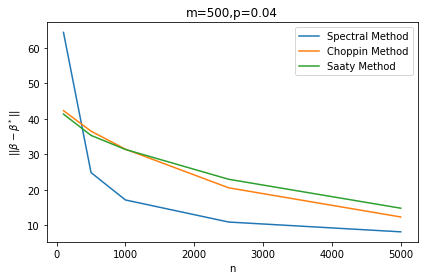

In [36]:
# plt.plot(n_array, np.mean(errors_mmle_arr, 1), label="Marginal MLE")
# plt.plot(n_array, np.mean(errors_cmle_arr, 1), label="Conditional MLE")
plt.plot(n_array, np.mean(errors_ase_arr, 1), label="Spectral Method")
plt.plot(n_array, np.mean(errors_choppin_arr, 1), label="Choppin Method")
plt.plot(n_array, np.mean(errors_saaty_arr, 1), label="Saaty Method")


plt.legend()
plt.title(rf"m={m},p={p}")
plt.xlabel("n")
plt.ylabel(r'$|| \beta - \beta^*||$')
plt.tight_layout()
plt.savefig(f"pics/eigen_vector_methods_m={m}_p={p}.png")
# plt.title(r'$d = mnp^2$, $p = \sqrt{\log m/n}$')

Text(0, 0.5, '$|| \\beta - \\beta^*||$')

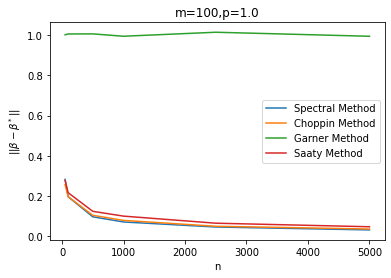

In [24]:
plt.plot(n_array, np.mean(errors_ase_arr, 1), label="Spectral Method")
plt.plot(n_array, np.mean(errors_choppin_arr, 1), label="Choppin Method")
plt.plot(n_array, np.mean(errors_garner_arr, 1), label="Garner Method")
plt.plot(n_array, np.mean(errors_saaty_arr, 1), label="Saaty Method")


plt.legend()
plt.title(rf"m={m},p={p}")
plt.xlabel("n")
plt.ylabel(r'$|| \beta - \beta^*||$')